# Effect of Weather Conditions on Car Crash Counts

## 1.	Introduction and Discussion of the Background

Seattle is a seaport city on the West Coast of the United States. It is the seat of King County, Washington. Seattle is the largest city in both the state of Washington and the Pacific Northwest region of North America. According to U.S. Census data released in 2019, the Seattle metropolitan area’s population stands at 3.98 million, making it the 15th largest in the United States. In July 2013, Seattle was the fastest-growing major city in the United States and remained in the top five in May 2015 with an annual growth rate of 2.1%. In July 2016, Seattle was again the fastest-growing major U.S. city, with a 3.1% annual growth rate. [1]

Seattle scores lots of gloomy points for being the northern most major city in the U.S., which means we have the least amount of daylight in the heart of winter. Combine that with it coinciding with the rainy season and you get fall and winter months when it rains on 20-23 of the 30-31 days and, according to the site, only get 28% of possible sunshine. [2]

As we know, weather acts through visibility impairments, precipitation, high winds, and temperature extremes to affect driver capabilities, vehicle performance (i.e., traction, stability and maneuverability), pavement friction, roadway infrastructure, crash risk, traffic flow, and agency productivity. [3]. And thus, this report will focus in the effect of weather conditions on the car accidents in Seattle from Jan 1, 2004 to May 20, 2020.

## 2.	Data Description

This dataset reflects traffic collision incidents in Seattle dating from Jan 1, 2004 to May 20, 2020.

Following data sources will be needed to show the effect of weather conditions on the car accidents

•	Locations where incidents occurred will be obtained using Google Maps API reverse geocoding

•	Bar graph used to show the effect of road conditions (severity from 0 to 10) to numbers of incidents

## 3.	Methodology

All necessary packages needed to be imported including numpy, pandas, anaconda, folium, matplotlib, re, json, ElementTrees, requests

In [5]:
import numpy as np

In [6]:
import pandas as pd

In [7]:
!conda install -c anaconda xlrd --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    xlrd-1.2.0                 |             py_0         108 KB  anaconda
    ca-certificates-2020.7.22  |                0         132 KB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    openssl-1.1.1h             |       h7b6447c_0         3.8 MB  anaconda
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following packages will be UPDATED:

    ca-certificates: 2020.7.22-0       --> 2020.7.22-0       anaconda
    certifi:         2020.6.20-py36_0  --> 2020.6.20-py36_0  anaconda
    openssl:         1.1.1h-h7b6447c_0 --> 1.1.1h-h7b6447c_0 anaconda
    xlrd:            1.2.0-py_0       

In [8]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1h             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.6.20          |   py36h9880bd3_2         151 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    ------------------------------------------------------------
                       

In [9]:
from IPython.core.interactiveshell import InteractiveShell # makes all cells allow multiple outputs
InteractiveShell.ast_node_interactivity = "all"

In [10]:
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline
plt.style.use('bmh') # prettier plots
plt.rcParams['figure.figsize'] = (8, 6)
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 10

In [12]:
import re
import json

In [13]:
import requests

First, collisions data was imported. It included the coordinates, street addresses, road and weather conditions, collision types, and incident dates.

In [15]:
df_incidents = pd.read_csv('https://filebin.net/311mor3pspnb6pcf/Data-Collisions.csv?t=bugn6bs8')
df_incidents.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.32,47.70,1,1307,1307,3502005,Matched,Intersection,"37,475.00",...,Wet,Daylight,NaN,nan,NaN,10,Entering at angle,0,0,N
1,1,-122.35,47.65,2,52200,52200,2607959,Matched,Block,nan,...,Wet,Dark - Street Lights On,NaN,"6,354,039.00",NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.33,47.61,3,26700,26700,1482393,Matched,Block,nan,...,Dry,Daylight,NaN,"4,323,031.00",NaN,32,One parked--one moving,0,0,N
3,1,-122.33,47.60,4,1144,1144,3503937,Matched,Block,nan,...,Dry,Daylight,NaN,nan,NaN,23,From same direction - all others,0,0,N
4,2,-122.31,47.55,5,17700,17700,1807429,Matched,Intersection,"34,387.00",...,Wet,Daylight,NaN,"4,028,032.00",NaN,10,Entering at angle,0,0,N


In [16]:
from xml.etree import ElementTree

Select and extract columns severity code SEVERITYCODE, longitude X, latitude Y, and severity description SEVERITYDESC from the main dataframe df_incidents

In [17]:
df_map = df_incidents[["SEVERITYCODE","X","Y","SEVERITYDESC"]]
df_map.head()

,SEVERITYCODE,X,Y,SEVERITYDESC
0,2,-122.32,47.70,Injury Collision
1,1,-122.35,47.65,Property Damage Only Collision
2,1,-122.33,47.61,Property Damage Only Collision
3,1,-122.33,47.60,Property Damage Only Collision
4,2,-122.31,47.55,Injury Collision


In [18]:
df_map = df_map.dropna()
df_map

,SEVERITYCODE,X,Y,SEVERITYDESC
0,2,-122.32,47.70,Injury Collision
1,1,-122.35,47.65,Property Damage Only Collision
2,1,-122.33,47.61,Property Damage Only Collision
3,1,-122.33,47.60,Property Damage Only Collision
4,2,-122.31,47.55,Injury Collision
...,...,...,...,...
194668,2,-122.29,47.57,Injury Collision
194669,1,-122.34,47.69,Property Damage Only Collision
194670,2,-122.31,47.68,Injury Collision
194671,2,-122.36,47.68,Injury Collision


Python folium library was used to visualize geographic details of incidents in Seattle and its boroughs using provided latitude and longitude values (the size had been reduced to 100 to reduce running time).

In [19]:
limit = 100
df_map = df_map.iloc[0:limit, :]
locations = df_map[['Y', 'X']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[0]

100

[47.70314032, -122.32314840000002]

In [20]:
import folium
latitude = 47.6062
longitude = -122.3321
seattle_map = folium.Map(location=[latitude, longitude], zoom_start=10)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point]).add_to(seattle_map)
seattle_map

It was quite hard to see all the locations of incidents since there were many incidents recorded from Jan 1, 2004 to May 20, 2020. FOr this case, MarkerCluster package was used to combine markers of close proximity into clusters, and simplify the display of markers on the map. (Notice that as you zoom into any of the cluster locations, the number on the cluster decreases, and you begin to see the individual markers on the map. Zooming out of the map consolidates the markers into clusters again.)

In [21]:
from folium.plugins import MarkerCluster

In [22]:
seattle_map2 = folium.Map(location=[latitude, longitude], tiles='CartoDB dark_matter', zoom_start=11)
marker_cluster = MarkerCluster().add_to(seattle_map2)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point]).add_to(marker_cluster)
seattle_map2

Next, we will need to create a bar graph showing the relationship between the conditions of weather to the number of incidents. In order to do that, we would need to extract 2 columns incident dates "INCDATE", and weather conditions "WEATHER" from our main dataframe "df_incidents".

In [23]:
df_weather = df_incidents[["INCDATE","WEATHER"]].dropna()
df_weather.head()

,INCDATE,WEATHER
0,2013/03/27 00:00:00+00,Overcast
1,2006/12/20 00:00:00+00,Raining
2,2004/11/18 00:00:00+00,Overcast
3,2013/03/29 00:00:00+00,Clear
4,2004/01/28 00:00:00+00,Raining


Functions value_counts() was used to count the numbers of incidents happened for different conditions of weather, ranking severity from 0 to 10.

In [24]:
df_cts = df_weather['WEATHER'].value_counts().rename_axis('WEATHERTYPES').reset_index(name='INCCOUNTS')
severity = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
df_cts['SEVERITY'] = severity
df_cts.head()

,WEATHERTYPES,INCCOUNTS,SEVERITY
0,Clear,111135,10
1,Raining,33145,9
2,Overcast,27714,8
3,Unknown,15091,7
4,Snowing,907,6


## 4.	Results

Finally, a bar graph was created to show the effect of weather conditions to car crash counts. Obviously, on the worst weather conditions (severity 10), the number of incidents was significantly higher than other, which was 111135 incidents recorded. There were nearly zeros in severities 0, 1, 2, and 3 compared to 10.

<BarContainer object of 11 artists>

Text(0.5, 0, 'SEVERITY')

Text(0, 0.5, 'Total of Incidents')

([<matplotlib.axis.XTick at 0x7fa2640dd198>,
 <a list of 11 Text xticklabel objects>)

Text(0.5, 1.0, 'Weather Conditions Versus Incidents from 2004 to 2019')

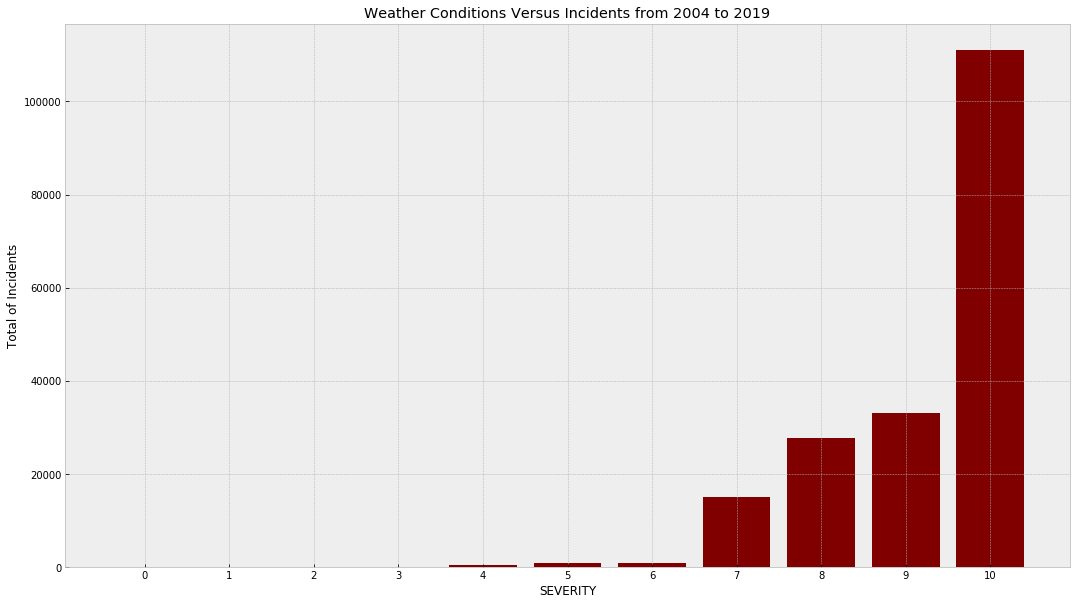

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (18, 10)) 


# creating the bar plot 
dfx = df_cts['SEVERITY']
dfy = df_cts['INCCOUNTS']
dfya = dfy.sort_values()
plt.bar(dfx, dfy, color ='maroon')
plt.xlabel("SEVERITY") 
plt.ylabel("Total of Incidents") 
plt.xticks(dfx)
plt.title("Weather Conditions Versus Incidents from 2004 to 2019") 


plt.show() 



## 5.	Discussion

As above, from the collision geographic clustering, the Downtown of Seattle are the one with most events. Obviously, this neighborhood should be examined carefully and take more attention and evaluation from local government in order to have solutions in reducing collision incidents, and increasing infrastructure. 

## 6.	Conclusion

As mentioned, Seattle is one of the biggest cities in the United States with high population. Extremely dangerous weather and road conditions can cause severe accidents. However, for less severe conditions such as rainy or wet roads, cautions are needed to reduce risks involving personal injuries. Using folium and marker clusters packages in Python, we can easily visualize which areas have higher rates of accidents, so we can avoid to travel to those areas during bad weather. The purpose is to help people travel safe and reduce accidents as much as possible.

## 7.	References

[1] Seattle – Wikipedia
https://en.wikipedia.org/wiki/Seattle


[2] Report: Seattle has 2nd most depressing winter in the U.S.
https://komonews.com/weather/scotts-weather-blog/report-seattle-has-2nd-most-depressing-winter-in-the-us


[3] How Do Weather Events Impact Road?
https://ops.fhwa.dot.gov/weather/q1_roadimpact.htm

